# 1. Collecting Reviews

## Setting up Beutiful Soup and Requests

In [2]:
!pip install requests beautifulsoup4

  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached beautifulsoup4-4.11.2-py3-none-any.whl (129 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.0.1-cp310-cp310-win_amd64.whl (96 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
  Using cached soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)


In [42]:
import requests
from bs4 import BeautifulSoup
import re
import time

In [2]:
# Make a request to yelp to get the raw HTML document using requests
url = r'https://www.yelp.com/biz/mcdonalds-los-angeles-106'
html = requests.get(url)

In [3]:
# Check the Status code of the html response
html.status_code

200

In [4]:
# View the raw response
html.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

## Convert Text to Soup

In [5]:
# Convert raw HTML to soup
soup = BeautifulSoup(html.text, 'html.parser')

In [6]:
# Example of getting all the links in a page
soup.find_all('a')

[<a class="logo-link__09f24__fS20h css-1sie4w0" href="/" role="link">Yelp</a>,
 <a class="header-link__09f24__mxjHd" href="/advertise/consumer_header_redirect"><div class="padding-t1__09f24__fS5BJ padding-r1__09f24__ibKww padding-b1__09f24__mrxd5 padding-l1__09f24__bjmD7 border-color--default__09f24__NPAKY"><div class="notification-wrapper__09f24__EZV76 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY"><p class="header-link-text__09f24__Ny6r9 css-gutk1c" data-font-weight="semibold">For Businesses</p></div></div></a>,
 <a class="header-link__09f24__mxjHd" href="/writeareview"><div class="padding-t1__09f24__fS5BJ padding-r1__09f24__ibKww padding-b1__09f24__mrxd5 padding-l1__09f24__bjmD7 border-color--default__09f24__NPAKY"><div class="notification-wrapper__09f24__EZV76 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY"><p class="header-link-text__09f24__Ny6r9 css-gutk1c" data-font-weight="semibold">Write a Review</p></div></div></a>,
 <a class

In [7]:
# Grab all of the reviews where the tag is span
# where lang = en and class includes raw_
regex = re.compile('raw__')
results = soup.find_all('span', {'lang': 'en'}, class_=regex)

In [8]:
reviews = [review.text for review in results]

## Scraping Multible Pages

In [10]:
link = input('Enter a Yelp link: ')
links = [link+'?start='+str(10+idx*10) for idx in range(12)]

Enter a Yelp link:  https://www.yelp.com/biz/mcdonalds-los-angeles-106


In [ ]:
test = links[0]
r = requests.get('https://www.tripadvisor.de/Restaurant_Review-g187314-d4148718-Reviews-Maximilian_s-Augsburg_Swabia_Bavaria.html')
print(r.status_code)

In [9]:
# Identify the pattern of links
['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10', # page 2
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',  # page 7
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120'] # page 13

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [10]:
# Dynamic link generation
links = []
links.insert(0, 'https://www.yelp.com/biz/mcdonalds-los-angeles-106')
for x in range(12):
    links.append(f'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start={10+10*x}')

In [11]:
links

['https://www.yelp.com/biz/mcdonalds-los-angeles-106',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=10',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=20',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=30',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=40',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=50',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=60',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=70',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=80',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=90',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=100',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=110',
 'https://www.yelp.com/biz/mcdonalds-los-angeles-106?start=120']

In [12]:
reviews = []
for link in links:
    html = requests.get(link)
    if html.status_code == 200:
        soup = BeautifulSoup(html.text, 'html.parser')
        results = soup.find_all('span', {'lang': 'en'}, class_=regex)
        for review in results:
            reviews.append(review.text)
    else:
        print('[HTML ERROR] Did not recive HTML Status code 200 (ok) but ', html.status_code)

In [13]:
len(reviews)

126

## Using a class

In [39]:
class Yelp_Reviews:
    def __init__(self, buisness):
        self.buisness = buisness
        self.url = f'https://www.yelp.com/biz/{self.buisness}?sort_by=date_desc'
        
    def get_reviews(self, page):
        reviews = []
        link = self.url + '?start=' + str(page*10)
        html = requests.get(link)
        if html.status_code == 200:
            soup = BeautifulSoup(html.text, 'html.parser')
            results = soup.find_all('span', {'lang': 'en'})
            for review in results:
                reviews.append(review.text)
            return reviews
        else:
            print('Page not found')
            return False

In [43]:
yelp = Yelp_Reviews('mcdonalds-los-angeles-106')
reviews = []
for x in range(10):
    print(f'Getting Page {x}')
    time.sleep(0.3)
    reviews.append(yelp.get_reviews(x))

Getting Page 0
Getting Page 1
Getting Page 2
Getting Page 3
Getting Page 4
Getting Page 5
Getting Page 6
Getting Page 7
Getting Page 8
Getting Page 9


# 2. Analysing the Reviews

## Callculating Text Metrics

In [47]:
import pandas as pd
import numpy as np

In [58]:
df = pd.DataFrame(np.array(reviews).flatten(), columns=['review'])

In [16]:
df.drop(labels=3, axis=0, inplace=True)

In [17]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split(' ')))
df['char_count'] = df['review'].str.len()

In [19]:
df['word_count'].max()

274

In [20]:
print(df[df['word_count']==274]['review'].values[0])

Our morning started out right: it was bright and early, and I was well-rested and HUNGRY.  Like, I need food NOW.  13 hours of power-walking around Disneyland the day before does this to a person!So we got on the road and found a great restaurant on Yelp. Hundreds of reviews and very high rating. And when we were a block away, my husband turned the car around and decided to go to McDonalds. Really? That's what he wanted on his 30th bday?!!What he really wanted was a fast meal so that we could see the sites we wanted to and then make the drive back up to the Bay Area. So McDonalds it was.  Drive-thru was fast - oddly, a woman stood out front and she took our order. Only strange because the car behind us ordered at the usual screen thing. No matter.  I tried the all egg-white McMuffin (no additional charge for the all-white substitution). This was new to me. Just as good as the McMuffin I've always enjoyed. But healthier, I guess. Not that I'm dining at McD's because I'm all that health 

## Counting Stopwords

In [47]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ----------- ---------------------------- 0.4/1.5 MB 8.7 MB/s eta 0:00:01
     ----------------------------- ---------- 1.1/1.5 MB 11.9 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
     ---------------------------------------- 78.5/78.5 kB ? eta 0:00:00
     ---------------------------------------- 0.0/267.7 kB ? eta -:--:--
     ------------------------------------- 267.7/267.7 kB 16.1 MB/s eta 0:00:00
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words = stopwords.words('english')

In [23]:
df['stopword_count'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [24]:
# num_stopwords = []
# for row in df.iterrows():
#     review = row[1][0]
#     num_stopword = 0
#     for word in review.split():
#         if word in stop_words:
#             num_stopword +=1
#     num_stopwords.append(num_stopword)

# df['stopword_count'] = num_stopwords

In [25]:
df[df['stopword_count']==115]

,review,word_count,char_count,stopword_count
63,Our morning started out right: it was bright a...,274,1455,115


# 3. Cleaning the Dataset

## Lowercase all Words

In [28]:
df['review_lower'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [29]:
df.head()

,review,word_count,char_count,stopword_count,review_lower
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...
1,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...
2,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food..."
4,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...
5,Best Micky Ds fries in LA but nobody likes a t...,70,373,30,best micky ds fries in la but nobody likes a t...


## Stripping Punctuation

In [32]:
df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')

C:\Users\leonr\AppData\Local\Temp\ipykernel_13752\760639540.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_nopunc'] = df['review_lower'].str.replace('[^\w\s]','')


In [34]:
df['review_lower'].iloc[0]

"just an average mcdonald's nothing particularly special. love a late night burger though"

In [35]:
df['review_nopunc'].iloc[0]

'just an average mcdonalds nothing particularly special love a late night burger though'

In [36]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...
1,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...
2,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...
4,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...
5,Best Micky Ds fries in LA but nobody likes a t...,70,373,30,best micky ds fries in la but nobody likes a t...,best micky ds fries in la but nobody likes a t...


## Removing Stopwords

In [41]:
df['review_nostop'] = df['review_nopunc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [43]:
df['review_nopunc'].loc[0]

'just an average mcdonalds nothing particularly special love a late night burger though'

In [44]:
df['review_nostop'].loc[0]

'average mcdonalds nothing particularly special love late night burger though'

In [42]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...
1,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...
2,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...
4,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...
5,Best Micky Ds fries in LA but nobody likes a t...,70,373,30,best micky ds fries in la but nobody likes a t...,best micky ds fries in la but nobody likes a t...,best micky ds fries la nobody likes tough bisc...


## Visualising Common Words

In [46]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached Pillow-9.4.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
freq = pd.Series(" ".join(df['review_nostop']).split()).value_counts().reset_index()

In [55]:
freq.columns = ['words', 'frequencies']

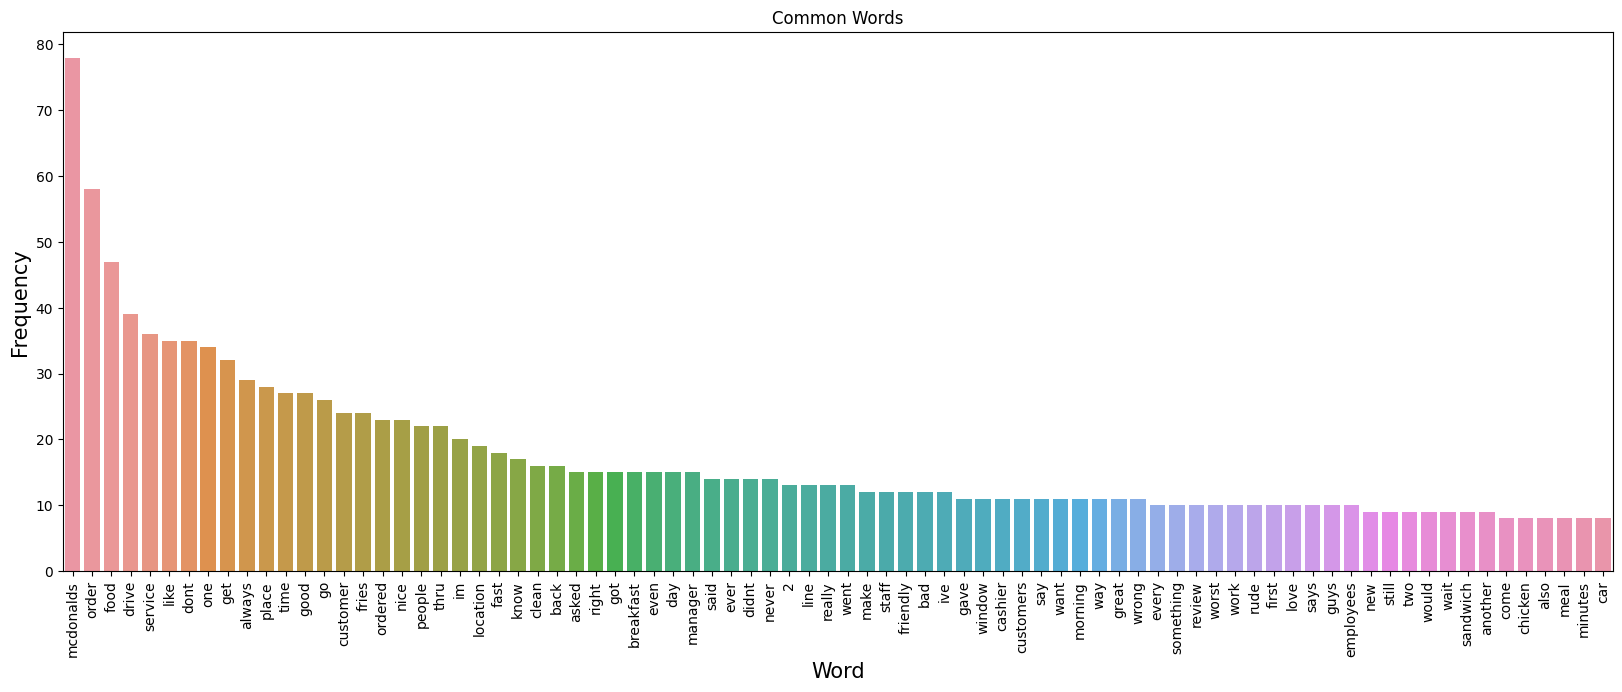

In [72]:
plt.figure(figsize=(20,7))
plt.title('Common Words')
sns.barplot(x='words', y='frequencies', data=freq[0:80])
plt.xticks(rotation=90)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

## Stripping Out Common Words

In [73]:
other_stopwords = ['one', 'get', 'go', 'im', '2', 'thru', 'tell',
                   'says', 'two']

In [74]:
df['review_noother'] = df['review_nostop'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stopwords))

In [75]:
df.head()

,review,word_count,char_count,stopword_count,review_lower,review_nopunc,review_nostop,review_noother
0,Just an average McDonald's Nothing particularl...,13,88,2,just an average mcdonald's nothing particularl...,just an average mcdonalds nothing particularly...,average mcdonalds nothing particularly special...,average mcdonalds nothing particularly special...
1,Ordered from a fast food burger place that lef...,15,88,5,ordered from a fast food burger place that lef...,ordered from a fast food burger place that lef...,ordered fast food burger place left burgers nu...,ordered fast food burger place left burgers nu...
2,"Nice floor and sitting area, clean store, food...",17,95,3,"nice floor and sitting area, clean store, food...",nice floor and sitting area clean store food o...,nice floor sitting area clean store food ok ni...,nice floor sitting area clean store food ok ni...
4,Very clean and organized. I like it made me fe...,97,485,42,very clean and organized. i like it made me fe...,very clean and organized i like it made me fee...,clean organized like made feel comfortable sta...,clean organized like made feel comfortable sta...
5,Best Micky Ds fries in LA but nobody likes a t...,70,373,30,best micky ds fries in la but nobody likes a t...,best micky ds fries in la but nobody likes a t...,best micky ds fries la nobody likes tough bisc...,best micky ds fries la nobody likes tough bisc...


In [77]:
freq = pd.Series(" ".join(df['review_noother']).split()).value_counts().reset_index()
freq.columns = ['words', 'frequencies']

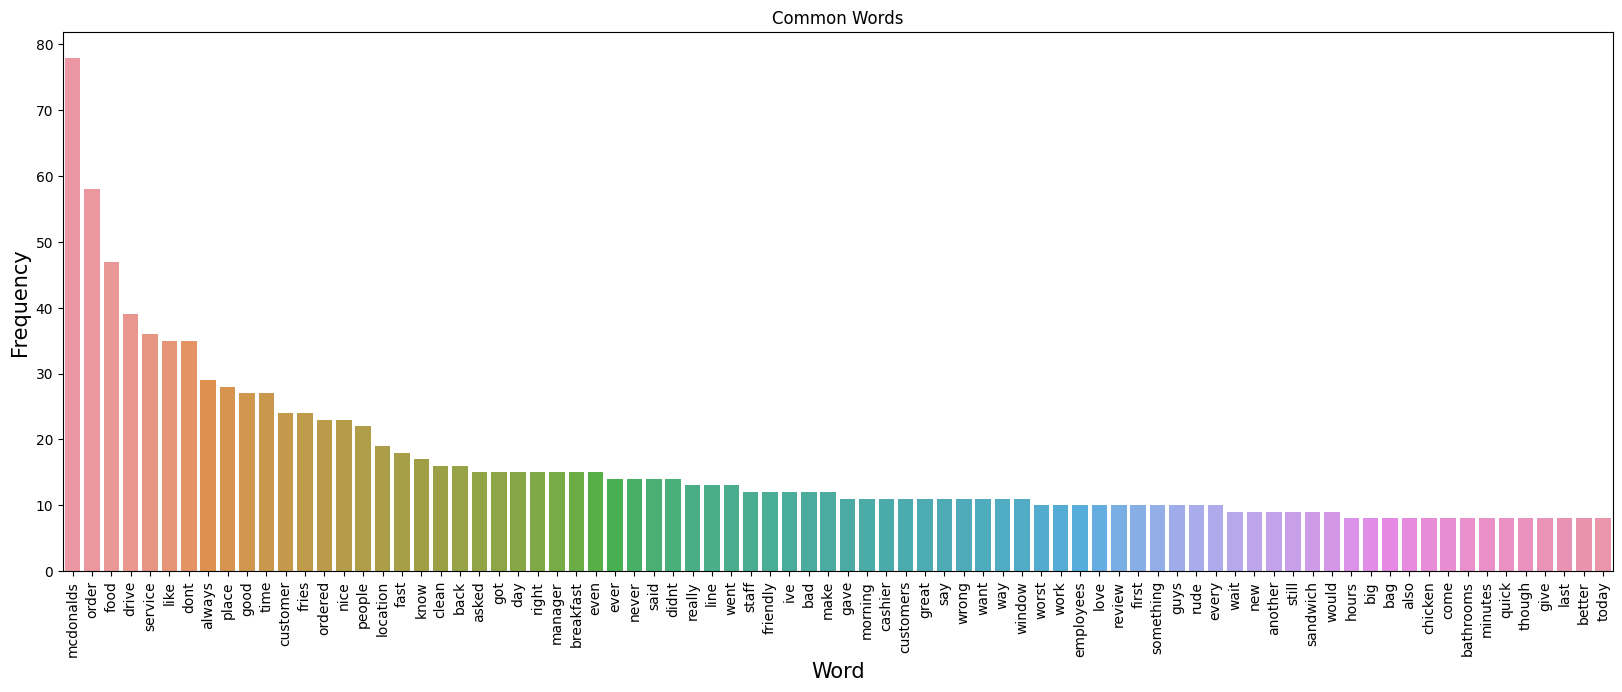

In [78]:
plt.figure(figsize=(20,7))
plt.title('Common Words')
sns.barplot(x='words', y='frequencies', data=freq[0:80])
plt.xticks(rotation=90)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

# 4. Lemamtize the Reviews

In [79]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ------------------------------------- 636.8/636.8 kB 19.6 MB/s eta 0:00:00


In [80]:
from textblob import Word
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\leonr\AppData\Roaming\nltk_data...


True

In [81]:
df['cleaned_review'] = df['review_noother'].apply(
    lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [86]:
print(df['review'].iloc[11])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df['cleaned_review'].iloc[11])

Tried using this deal at this location off la Brea and it didn't apply. Mind u this is my local McDonald's. I didn't get my discount on my mango smoothie which is well worth it I only pay like 1.25 for a smoothie. When I tell the manager he says oh that deal doesn't work at this location/ doesn't apply to a mango smoothie. BOY I've gotten here before y'all just mad lazy. This McDonald's always lacking, plus they act like the dips come out their paycheck.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tried using deal location la brea didnt apply mind u local mcdonalds didnt discount mango smoothie well worth pay like 125 smoothie manager oh deal doesnt work location doesnt apply mango smoothie boy ive gotten yall mad lazy mcdonalds always lacking plus act like dip come paycheck


# 5. Sentiment Analysis

In [87]:
from textblob import TextBlob

In [88]:
df['subjectivity'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [94]:
df[['review', 'polarity', 'subjectivity']].head(10)

,review,polarity,subjectivity
0,Just an average McDonald's Nothing particularl...,0.101786,0.542857
1,Ordered from a fast food burger place that lef...,0.100000,0.300000
2,"Nice floor and sitting area, clean store, food...",0.511111,0.700000
4,Very clean and organized. I like it made me fe...,0.357407,0.492593
5,Best Micky Ds fries in LA but nobody likes a t...,0.014931,0.403125
6,This is a quick review of the mobile app picku...,0.319048,0.519841
7,This specific McDonald's is just straight garb...,-0.130303,0.383712
8,McDonald's always pleases with its delicious f...,0.458333,0.833333
9,Not all McDonald's are created equal. They hav...,0.400000,0.337500
10,This lady was so unprofessional rushing me whi...,-0.300000,0.725000


In [98]:
print(df.iloc[9]['review'])

This lady was so unprofessional rushing me while she was still airing another customer. Informed the manager and got a fake apology I came here for convenience to feed my children this crap while I have a emergency happening ruined the rest of my evening. I'm never returning  it even on my worse day. Do better. McDonald's. Customer service should improve


In [99]:
df['polarity'].min()

-1.0

In [118]:
df[df['polarity'] >= 0.7].iloc[0]['review']

'I have never in my life had a triple cheeseburger with no pickles as good as this one!'

# 6. Additional Test

In [1]:
!pip install nbformat 

     ---------------------------------------- 0.0/78.1 kB ? eta -:--:--
     ---------------------------------------- 78.1/78.1 kB 4.2 MB/s eta 0:00:00
  Using cached fastjsonschema-2.16.2-py3-none-any.whl (22 kB)
     ---------------------------------------- 0.0/90.4 kB ? eta -:--:--
     ---------------------------------------- 90.4/90.4 kB ? eta 0:00:00
     ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/60.0 kB ? eta -:--:--
     ---------------------------------------- 60.0/60.0 kB ? eta 0:00:00


In [4]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv('Data/Results.csv')

In [5]:
filtered_df = df

In [17]:
filtered_df['polarity_rounded'] = filtered_df['polarity'].round(1)

In [18]:
z = filtered_df['polarity_rounded'].value_counts()

In [19]:
z1 = z.to_dict()
filtered_df['Count_Column'] = filtered_df['polarity_rounded'].map(z1) 

In [20]:
data = df['polarity'].round(2)

In [41]:
counts = pd.DataFrame(z).reset_index()
counts.columns = ['polarity_rounded', 'Count_Column']

<AxesSubplot: xlabel='polarity_rounded', ylabel='Count_Column'>

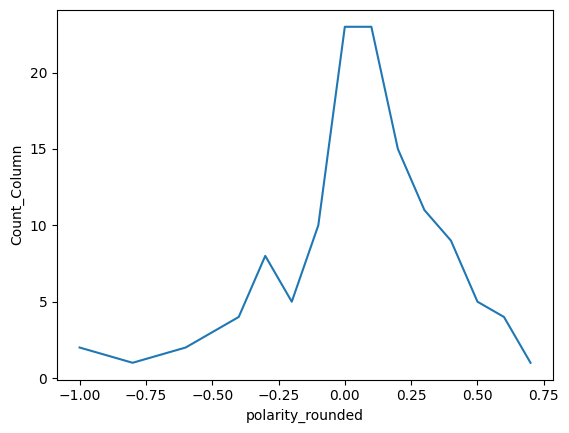

In [43]:
sns.lineplot(counts, x='polarity_rounded', y='Count_Column')

In [48]:
counts.sort_values('polarity_rounded')

,polarity_rounded,Count_Column
12,-1.0,2
15,-0.8,1
13,-0.6,2
11,-0.5,3
9,-0.4,4
6,-0.3,8
8,-0.2,5
4,-0.1,10
1,0.0,23
0,0.1,23


In [47]:
counts

,polarity_rounded,Count_Column
0,0.1,23
1,0.0,23
2,0.2,15
3,0.3,11
4,-0.1,10
5,0.4,9
6,-0.3,8
7,0.5,5
8,-0.2,5
9,-0.4,4
